Principal Component Analysis (PCA) is a statistical technique used in machine learning for dimensionality reduction while preserving as much variability as possible. It is particularly useful when dealing with high-dimensional data, enabling simpler models, reducing overfitting, and decreasing computational costs.

Problem Statement 1:

You are working with a dataset comprising measurements from multiple sensors (30 sensors). Each sensor records a parameter affecting the manufacturing quality of an electronic component. The dataset has 10,000 observations (samples). The goal is to reduce the dimensionality of this dataset to enhance a subsequent machine learning model's performance
that predicts the quality of the component.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
df= pd.read_csv('sensor_data.csv')
df.head()


,SampleID,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,...,Sensor22,Sensor23,Sensor24,Sensor25,Sensor26,Sensor27,Sensor28,Sensor29,Sensor30,Quality
0,1,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,...,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0
1,2,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,...,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,0
2,3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,...,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,1
3,4,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,...,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342,1
4,5,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,...,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,0


Number of components after PCA: 30


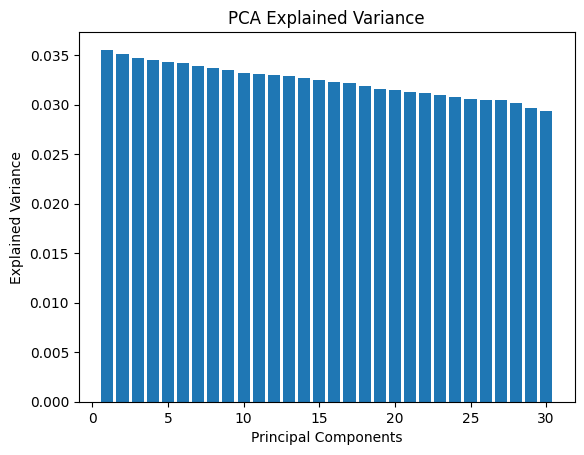

Accuracy with PCA is : 0.5085
Accuracy without PCA is : 0.4995


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('sensor_data.csv')
X = data.drop('Quality', axis=1)
y = data['Quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA transformation
pca = PCA(n_components=0.95) # retain 95% of variance
X_pca = pca.fit_transform(X_scaled)
print("Number of components after PCA:", pca.n_components_)

# Visualize the variance
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the PCA-reduced data
model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)
y_pred_pca = model_pca.predict(X_test)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA is :", accuracy_pca)

# Comparison with original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)
model_orig = LogisticRegression()
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print("Accuracy without PCA is :", accuracy_orig)

Problem Statement 2:

Assume you are a data scientist in a tech company that deals with large amounts of multi-dimensional data for predicting user behaviour based on usage patterns. Your dataset consists of 50 different features collected from user interactions within a software platform. The goal is to apply PCA to reduce the feature space without losing critical information necessary for predicting user churn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
df= pd.read_csv('user_data.csv')
df.head()


,user_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,churn
0,1,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,...,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,1
1,2,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,...,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,1
2,3,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,...,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,1
3,4,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,...,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876,0
4,5,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,...,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,0


Number of components after PCA: 47


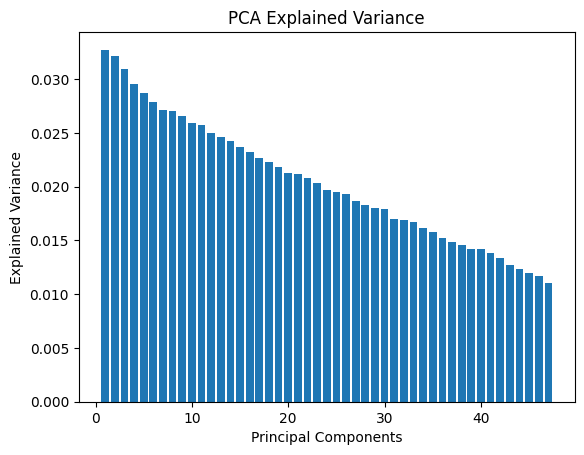

Accuracy with PCA is : 0.48
Accuracy without PCA is : 0.46


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('user_data.csv')
X = data.drop('churn', axis=1)
y = data['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Number of components after PCA:", pca.n_components_)

plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)
y_pred_pca = model_pca.predict(X_test)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA is :", accuracy_pca)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)
model_orig = LogisticRegression()
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print("Accuracy without PCA is :", accuracy_orig)
